### Importing Packages

In [33]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Load Data

In [34]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# menentukan path direktori data gambar pelatihan dan pengujian di Google Drive
train_dir = '/content/drive/MyDrive/dataset-mobil-motor/train'
test_dir = '/content/drive/MyDrive/dataset-mobil-motor/test'

### Preparing Data

In [36]:
# Pra-pemrosesan data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 528 images belonging to 2 classes.


In [39]:
# Memuat data pengujian
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Memuat data pengujian
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 30 images belonging to 2 classes.


### Building The Model

In [40]:
# Membangun model sequential
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Mengubah hasil konvolusi menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

### Training and Evaluating

In [41]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
hist = model.fit(
    train_data,
    epochs = 20,
    validation_data = test_data,
    batch_size= 32,
    shuffle= True
)

Epoch 1/20
17/17 [==============================] - 19s 766ms/step - loss: 0.7034 - accuracy: 0.5038 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
17/17 [==============================] - 11s 586ms/step - loss: 0.6968 - accuracy: 0.4886 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
17/17 [==============================] - 10s 599ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
17/17 [==============================] - 11s 636ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
17/17 [==============================] - 10s 599ms/step - loss: 0.6934 - accuracy: 0.4848 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
17/17 [==============================] - 10s 601ms/step - loss: 0.6933 - accuracy: 0.4811 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
17/17 [==============================] - 10s 576ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

In [43]:
model.save('model.h5')

1/1 [==============================] - 1s 1s/step - loss: 0.6932 - accuracy: 0.5000


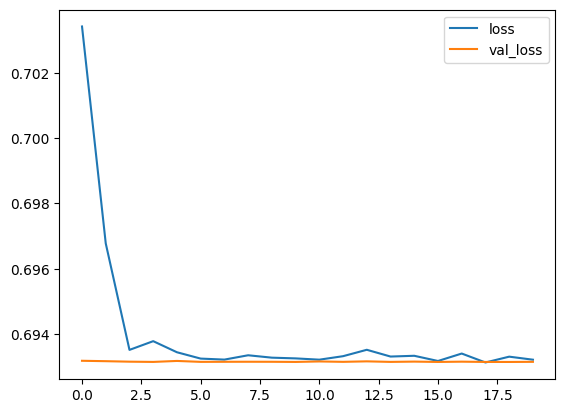

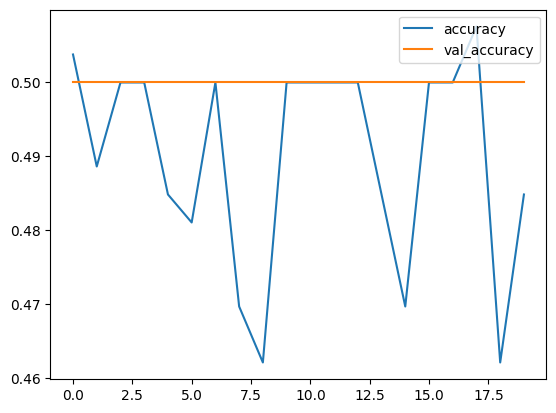

In [46]:
model.evaluate(test_data)

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

In [47]:
model = load_model('model.h5')

### Prediction

Saving motorbike_1.jpg to motorbike_1 (1).jpg
1/1 [==============================] - 0s 149ms/step
Predicted class: motor


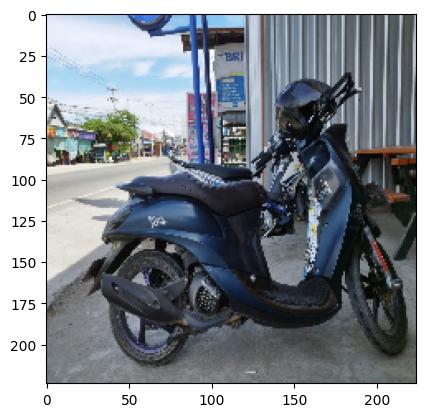

In [48]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = load_img(path, target_size = (224,224))
    imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 100)

    # Print prediction result
    predicted_class_index = np.argmax(classes)
    class_names = ['mobil', 'motor'] 
    predicted_class = class_names[predicted_class_index]

    print('Predicted class:', predicted_class)
    break